# Logistic Regression

# Install the following packages

## datasets
pip install vega_datasets
## creating plots packages
pip install matplotlib

pip install seaborn

## install machine learning package
pip install sklearn

## Details on the available datasets
## https://python-data-science.readthedocs.io/en/latest/datasets.html
## https://github.com/jakevdp/vega_datasets

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # import logistic regression
from sklearn import metrics
from vega_datasets import data

%matplotlib inline

In [2]:
dataset = data.seattle_weather()
dataset.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [3]:
dataset.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# weather is categorical variable.
dataset.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [5]:
dataset.shape

(1461, 6)

In [6]:
# Encode the categorical variables.
dataset['weather_code'] = dataset.weather.astype("category").cat.codes

In [7]:
dataset.weather_code.unique()

array([0, 2, 4, 3, 1], dtype=int8)

In [8]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather,weather_code
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


In [9]:
dataset.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
weather_code     0
dtype: int64

In [10]:
dataset.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
weather_code     0
dtype: int64

In [11]:
# Divide the data into “attributes” and “labels”
X = dataset[['temp_min',
            'temp_max',
            'wind',
            'precipitation',
            ]].values
y = dataset['weather_code'].values
# y = dataset['weather'].values


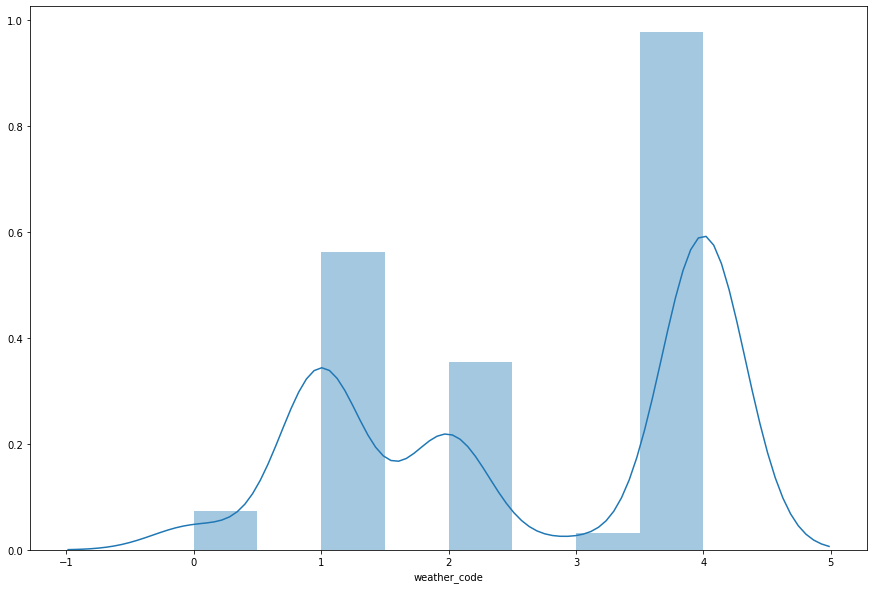

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['weather_code'])

In [13]:
# Divide the data into training and testing partition 
# train => 80%
# test => 20%
# we use the following function that we imported above:
# from sklearn.model_selection import train_test_split 

print(f'X : {X.shape}, y : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (f'X_train: {X_train.shape}')
print (f'X_test: {X_test.shape}')

print (f'y_train: {y_train.shape}')
print (f'y_test: {y_test.shape}')

X : (1461, 4), y : (1461,)
X_train: (1168, 4)
X_test: (293, 4)
y_train: (1168,)
y_test: (293,)


In [ ]:
# X_train.max(axis=0)

In [14]:
print('Before Normalization: ')
print(f'Train: max {X_train.max(axis=0)}, min {X_train.min(axis=0)}')
print(f'Test: max {X_test.max(axis=0)}, min {X_test.min(axis=0)}')

#Calculate mean and std for the training data. 
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

# normalize train and test data
X_train_nrom = (X_train - train_mean) / train_std
X_test_nrom = (X_test - train_mean) / train_std

print('*' * 20)
print('After Normalization: ')
print(f'Train: max {X_train_nrom.max(axis=0)}, min {X_train_nrom.min(axis=0)}')
print(f'Test: max {X_test_nrom.max(axis=0)}, min {X_test_nrom.min(axis=0)}')

Before Normalization: 
Train: max [18.3 35.   9.5 55.9], min [-7.1 -1.6  0.4  0. ]
Test: max [17.8 35.6  7.1 34.5], min [-3.9 -1.1  0.6  0. ]
********************
After Normalization: 
Train: max [1.99484284 2.52221554 4.24385542 7.46486467], min [-3.01454438 -2.44391689 -1.9579664  -0.45793396]
Test: max [1.89623286 2.60362755 2.60821011 4.43180759], min [-2.38344048 -2.37607355 -1.82166263 -0.45793396]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
regressor = LogisticRegression(solver='liblinear', max_iter=1000)  # solver='liblinear' for one-versus-rest 
regressor.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

# 1. Training accuracy.
## find how much the model fits the training dataset.
## Read about accuracy:
https://deepai.org/machine-learning-glossary-and-terms/accuracy-error-rate

## Read about Confusion Matrix
https://www.python-course.eu/confusion_matrix.php

In [16]:
y_pred = regressor.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df1 = df.head(20)
df1

Accuracy: 0.6327054794520548


,Actual,Predicted
0,2,1
1,4,4
2,1,1
3,2,1
4,4,4
5,2,1
6,4,4
7,2,1
8,4,4
9,4,4


# 2. Testing accuracy.
# Measure the quality of the model on unseen data

In [17]:
y_pred = regressor.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

Accuracy: 0.5392491467576792


,Actual,Predicted
0,4,4
1,4,1
2,1,1
3,4,4
4,4,4
5,1,1
6,1,1
7,1,1
8,1,4
9,1,4


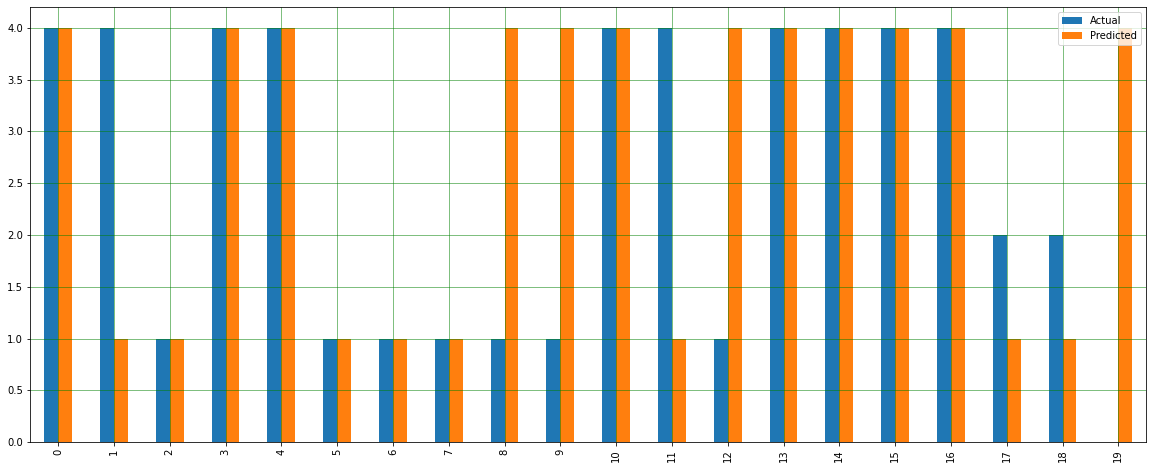

In [18]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0.5, 257.44, 'Predicted label')

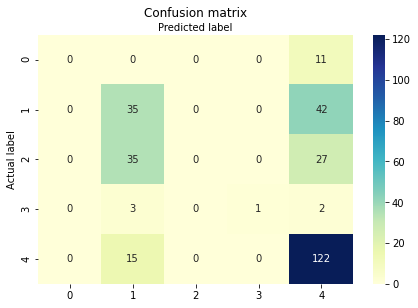

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1,2,3,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seabornInstance.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')